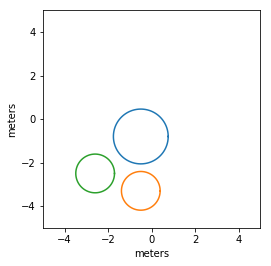

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

inp = np.load("04-03-2020_17-49-37.npy", allow_pickle=True)
lines = inp[0]
circ = inp[1]

fig, ax = plt.subplots()
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel("meters")
plt.ylabel("meters")
ax.set_aspect(1)

for c in circ:
    theta = np.linspace(0, 2*np.pi, 100)

    r = np.sqrt((c[0]/2)**2+(c[1]/2)**2-c[2])

    x1 = c[0]/2+r*np.cos(theta)
    x2 = c[1]/2+r*np.sin(theta)
    
    ax.plot(x1, x2)
plt.show()
    